### Deliverable 1: Preprocessing the Data for a Neural Network
1. Import Dependencies
2. Import the input dataset file = 'Resources/charity_data.csv'

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
file = 'Resources/charity_data.csv'
application_df = pd.read_csv(file)
application_df.head()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### Columns Description
- `EIN` and `NAME`—Identification columns (these columns will be removed from the input data)
- `IS_SUCCESSFUL`— Answer if the money used effectively (Binary 0 "No" or 1 "Yes"). This variable is the *TARGET* variable for us to determine if the charity donation was used effectively or not.
Hence, we determined the input values (which are our independent variables commonly referred to as model features or "X") and the target output (our dependent variable commonly referred to as target or "y" being the `IS_SUCCESFULL`)

#### The 9 independent variables on our model to predict `IS_SUCCESSFUL` are:
- `APPLICATION_TYPE`—Alphabet Soup application type (like T3, T10, T5, etc)
- `AFFILIATION`—Affiliated sector of industry (like Independent, CompanySponsored, etc)
- `CLASSIFICATION`—Government organization classification (like C1000, C2000, C3000, etc)
- `USE_CASE`—Use case for funding (like Healthcare, ProductDev, Preservation, etc)
- `ORGANIZATION`—Organization type (Trust, Association, Co-operative, etc)
- `STATUS`—Active status (0 or 1)
- `INCOME_AMT`—Income classification (0, 10000-24999, etc)
- `SPECIAL_CONSIDERATIONS`—Special consideration for application (Y, N)
- `ASK_AMT`—Funding amount requested


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

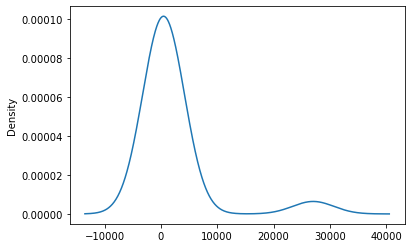

In [5]:
# Visualize the value counts of APPLICATION_TYPE by plotting the density
application_counts.plot.density()

## Categorical Values:
For a neural network to understand and evaluate a categorical variable, we must preprocess the values using a technique called one-hot encoding. One-hot encoding identifies all unique column values and splits the single categorical column into a series of columns, each containing information about a single unique categorical value.

But in order to apply One-hot encoding we **must reduce the number of unique values in the categorical variables.** The process of reducing the number of unique categorical values in a dataset is known as **bucketing or binning**. Bucketing data typically follows one of two approaches:
- For variable `APPLICATION_TYPE` and `CLASSIFICATION` we will collapse all of the infrequent and rare categorical values into a single "Other" category. In our case we will create a "Other" category when `APPLICATION_TYPE` has "<" less than 500 data points, and `CLASSIFICATION` has "<" less than 1000 data points
- For Create generalized categorical values and reassign all data points to the new corresponding values.


In [6]:
# BUCKETING `APPLICATION_TYPE`
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# BUCKETING `CLASSIFICATION`
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2561        1
C2170        1
C2500        1
C1580        1
C1245        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

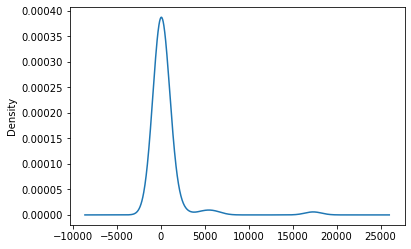

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than 1000, put together in "Other"
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

### 3. Generate Categorical Variable List

In [10]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# Generate our categorical variable lists
application_cat = []
numeric_columns = []
for col in application_df.columns:
    if is_string_dtype(application_df[col]) == True:
        application_cat.append(col)
    elif is_numeric_dtype(application_df[col]) == True:
        numeric_columns.append(col)
print(numeric_columns)
print(application_cat)

['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL']
['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']


### 4. Create a `OneHotEncoder` instance
### 5. Fit and Transform the `OneHotEncoder`

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 6. Add the encoded variable names to the DataFrame and drop the originals
Once we have our encoded categorical variables, we need to merge our encoded columns back into our original DataFrame (as well as remove the unencoded columns). To replace the unencoded categorical variables with the encoded variables.

In [12]:
# Merge one-hot encoded features and drop the originals from 'application_cat'
application_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=application_cat, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 8. Split the preprocessed data into features and target arrays
Hence, we determined the input values (which are our independent variables commonly referred to as model features or "X") and the target output (our dependent variable commonly referred to as target or "y" being the `IS_SUCCESFULL`)

### 9. Split the preprocessed data into training and testing dataset
Now, we must split our data into the training and testing sets prior to standardization to not incorporate the testing values into the scale—testing values are only for evaluation

In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop("IS_SUCCESSFUL", axis=1)

# Split the preprocessed data into a training and testing dataset, I selected random_state 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

#### 10. Create a `StandardScaler` instance and 
#### 11. Scale the data
We need to standardize our numerical variables using Scikit-Learn's `StandardScaler` class. Again, we must split our data into the training and testing sets prior to standardization, which was done on Step 9., to not incorporate the testing values into the scale.

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
len(X_train_scaled[0])

43

In [16]:
X_train_scaled.shape

(25724, 43)

### Deliverable 2: Compile, Train and Evaluate the Model

#### 13. Define the model
We chose the `Sequential` model
#### 14. Add first and second hidden layers
We'll use our typical binary classifier parameters:
- Our first hidden layer will have an input_dim equal to the length of the scaled feature data X (in our case 43) , and will use the `relu` activation function.
- Our second hidden layer will also use the `relu` activation function.
- The loss function should be `binary_crossentropy`, using the `adam` optimizer
#### 15. Add the output layer
-The output layer we chose activation `sigmoid`

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
nodes_hidden_layer1 = 80
nodes_hidden_layer2 = 30

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 86)                3784      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 87        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 3,873
Trainable params: 3,873
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])


In [19]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}hdf5"

In [27]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 0s 415us/step - loss: 0.5643 - accuracy: 0.7252
Epoch 2/100
804/804 [==============================] - 0s 416us/step - loss: 0.5642 - accuracy: 0.7268
Epoch 3/100
804/804 [==============================] - 0s 415us/step - loss: 0.5643 - accuracy: 0.7257
Epoch 4/100
804/804 [==============================] - 0s 412us/step - loss: 0.5644 - accuracy: 0.7257
Epoch 5/100
804/804 [==============================] - 0s 415us/step - loss: 0.5644 - accuracy: 0.7259

Epoch 00005: saving model to checkpoints\weights.05hdf5
Epoch 6/100
804/804 [==============================] - 0s 415us/step - loss: 0.5642 - accuracy: 0.7258
Epoch 7/100
804/804 [==============================] - 0s 415us/step - loss: 0.5643 - accuracy: 0.7260
Epoch 8/100
804/804 [==============================] - 0s 417us/step - loss: 0.5642 - accuracy: 0.7255
Epoch 9/100
804/804 [==============================] - 0s 415us/step - loss: 0.5644 - accuracy: 0.7261
Epoch 10/100
804

804/804 [==============================] - 0s 415us/step - loss: 0.5620 - accuracy: 0.7274
Epoch 72/100
804/804 [==============================] - 0s 427us/step - loss: 0.5623 - accuracy: 0.7278
Epoch 73/100
804/804 [==============================] - 0s 424us/step - loss: 0.5621 - accuracy: 0.7272
Epoch 74/100
804/804 [==============================] - 0s 420us/step - loss: 0.5620 - accuracy: 0.7271
Epoch 75/100
804/804 [==============================] - 0s 416us/step - loss: 0.5620 - accuracy: 0.7276

Epoch 00075: saving model to checkpoints\weights.75hdf5
Epoch 76/100
804/804 [==============================] - 0s 414us/step - loss: 0.5620 - accuracy: 0.7273
Epoch 77/100
804/804 [==============================] - 0s 419us/step - loss: 0.5620 - accuracy: 0.7278
Epoch 78/100
804/804 [==============================] - 0s 419us/step - loss: 0.5621 - accuracy: 0.7273
Epoch 79/100
804/804 [==============================] - 0s 412us/step - loss: 0.5620 - accuracy: 0.7269
Epoch 80/100
804/804

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5720 - accuracy: 0.7176
Loss: 0.5720335841178894, Accuracy: 0.7175509929656982


In [29]:
# Export our model to HDF5 file
nn_model.save("AlphabetSoupCharity.h5")

<AxesSubplot:>

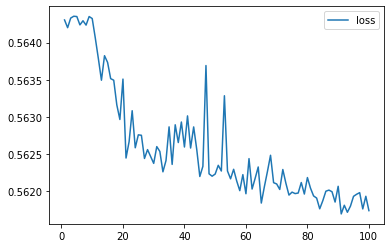

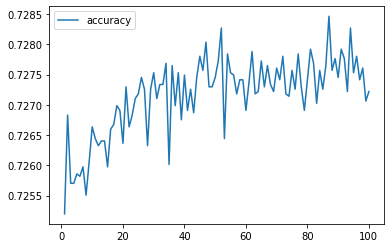

In [31]:
# Create a DataFrame containing training history
fit_model = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
fit_model.plot(y="loss")

# Plot the loss
fit_model.plot(y="accuracy")